In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import pickle
import tensorflow as tf
import math as m
from keras_preprocessing import image
import os
from tensorflow.keras.models import load_model
from numpy import unique, argmax

In [ ]:

def plot_history(history_fine):
  f1 = history_fine.history['accuracy']
  val_f1 = history_fine.history['val_accuracy']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
# Load Data 
import pickle
from google.colab import drive

In [ ]:

with open('/content/drive/MyDrive/model_AI/train_gender_2.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

In [ ]:


# Reshape Data
# x_pre_1 = x_train[1]
# x_pre_2 = x_train[300]
# x_pre_3 = x_train[200]


# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
#base
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# model.add(tf.keras.layers.Dropout(0.2)

# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# model.add(tf.keras.layers.Dropout(0.2)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# model.add(tf.keras.layers.Dropout(0.2)

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# model.add(tf.keras.layers.Dropout(0.2)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=60, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
model.summary()

model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= 'accuracy')
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)
# model.save("model_gender_2.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

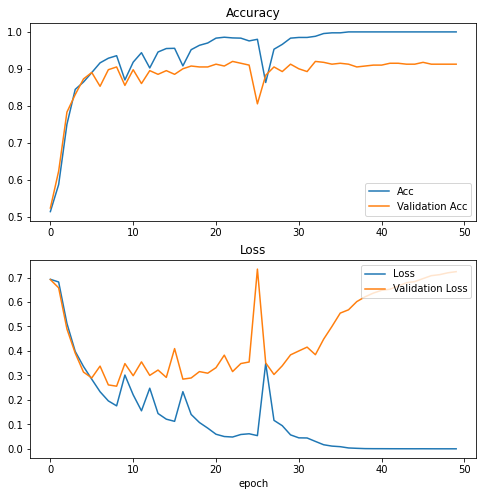

In [ ]:
plot_history(history)

male


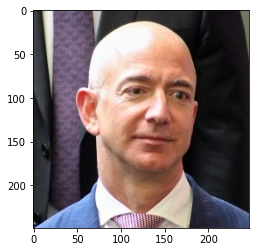

In [ ]:
frame_2 = cv2.imread("/content/predict.jpg")
frame_2 = cv2.cvtColor(frame_2,  cv2.COLOR_BGR2RGB)
# cv2.imshow('/content/7.jpg', frame)
i = 0
cv2.imwrite('final' + str(i) + ".jpg", frame_2)
test_image = image.load_img('final' + str(i) + ".jpg", target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = new_model.predict(test_image)
result1 = result[0]
for y in range(2):
  if result1[y] == 1.:
    break
prediction = classes[y]
print(prediction)
plt.imshow(frame_2)